<a href="https://colab.research.google.com/github/Shashwat-23/Text-to-Image-and-Video-Generation/blob/main/Text_To_Image_%26_Video!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate

In [ ]:
import torch
from diffusers import StableDiffusionPipeline

pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [ ]:
pipe = pipe.to("cuda")

  0%|          | 0/50 [00:00<?, ?it/s]

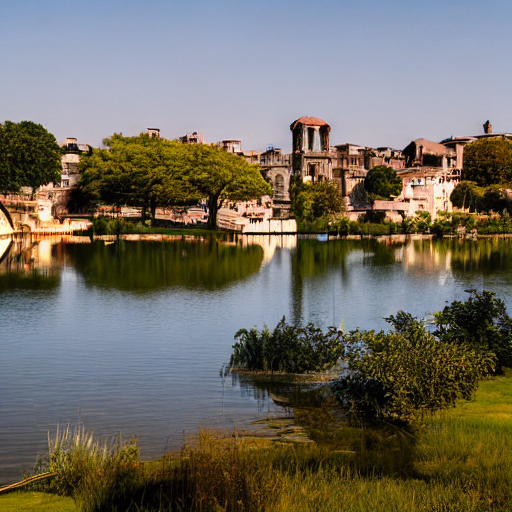

In [ ]:
# prompt = "a photograph of an astronaut riding a horse"
prompt = "a photograph of an old city lake view"
image = pipe(prompt).images[0]  # image here is in [PIL format](https://pillow.readthedocs.io/en/stable/)

# Now to display an image you can either save it such as:
image.save(f"astronaut_rides_horse.png")

# or if you're in a google colab you can directly display it with
image

In [ ]:

# importing cv2
import cv2
import os
image_path = r'/content/astronaut_rides_horse.png'
# to read the image
img = cv2.imread(image_path)
print("Before saving image:")
filename = 'savedImage.jpg'
cv2.imwrite(filename, img)


Before saving image:


True

In [ ]:
import cv2
from cv2 import dnn_superres

In [ ]:
# initialize super resolution object
sr=dnn_superres.DnnSuperResImpl_create()

In [ ]:
# read the model
# https://github.com/Saafke/EDSR_Tensorflow/blob/master/models/EDSR_x4.pb
path_1='EDSR_x4.pb'
sr.readModel(path_1)

In [ ]:
# set the model and scale
sr.setModel('edsr',4)

In [ ]:
sr.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
sr.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA)

In [ ]:
# load the image
image_1=cv2.imread('savedImage.jpg')

In [ ]:
# upsample the image
upscaled=sr.upsample(image_1)
# save the upscaled image
cv2.imwrite('upscaled_test.jpg',upscaled)


True

In [ ]:
a=cv2.imwrite('upscaled_test.jpg',upscaled)

In [ ]:
img_color = cv2.imread('upscaled_test.jpg',1)

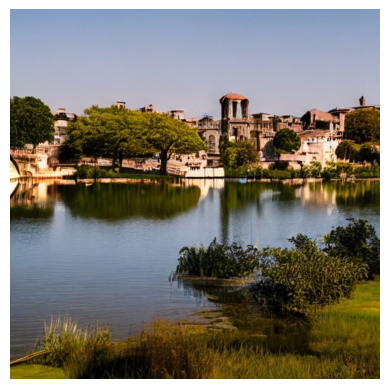

In [ ]:
from matplotlib import pyplot as plt
plt.axis("off")
plt.imshow(cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
type(image)

PIL.Image.Image

##Synthesizing video

In [ ]:
pip install diffusers transformers accelerate torch


In [ ]:
pip install diffusers

In [ ]:
import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler
from diffusers.utils import export_to_video
from IPython.display import HTML
from base64 import b64encode
import datetime

pipe = DiffusionPipeline.from_pretrained("damo-vilab/text-to-video-ms-1.7b", torch_dtype=torch.float16, variant="fp16")
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()
pipe.enable_vae_slicing()


!mkdir /content/videos

Loading pipeline components...:   0%|          | 0/5 [00:00<?, ?it/s]

mkdir: cannot create directory ‘/content/videos’: File exists


In [ ]:
# prompt = "Darth Vader is surfing on waves"
# video_frames = pipe(prompt=prompt, num_inference_steps=40, height=320, width=576, num_frames=24).frames
prompt = "Spiderman playing football"
video_frames = pipe(prompt, num_inference_steps=25, num_frames=200).frames
output_video_path = export_to_video(video_frames)

new_video_path = f'/content/videos/{datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")}.mp4'
!ffmpeg -y -i {output_video_path} -c:v libx264 -c:a aac -strict -2 {new_video_path} >/dev/null 2>&1

print(output_video_path, '->', new_video_path)

  0%|          | 0/25 [00:00<?, ?it/s]

/tmp/tmptb5pefr5.mp4 -> /content/videos/2023-08-19_13:42:48.mp4


In [ ]:
!cp {new_video_path} /content/videos/tmp.mp4
mp4 = open('/content/videos/tmp.mp4','rb').read()

decoded_vid = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML(f'<video width=400 controls><source src="{decoded_vid}" type="video/mp4"></video>')